In [2]:

from calculations import calculate_d_int, calculate_RU, calculate_u_dik

from analytical_prr_pir import * 
import pandas as pd
import math
import matplotlib.pyplot as plt




In [3]:


# Define MCS dictionary and configuration for analytical model
MCS_DICT = {
    4: {'channels': 2, 'sinr_threshold': 2.3},
    11: {'channels': 1, 'sinr_threshold': 10.13},
}

betas = [0.05, 0.1, 0.15]  # Different traffic densities
power = [23]  # Transmission power levels (dB)
numerology = [0]  # Numerologies to include
max_distance = 500  # Maximum distance (meters)
step_distance = 25  # Step size for distance bins
dis = list(range(0, max_distance + step_distance, step_distance))  # Distance bins

# Initialize list to store results
data = []

# Iterate over combinations of parameters
for P_t_dB in power:
    for beta in betas:
        for mcs_index, mcs_data in MCS_DICT.items():
            for num in numerology:
                channels = mcs_data['channels']
                sinr_threshold_dB = mcs_data['sinr_threshold']
                fc = 5.9  # Carrier frequency (GHz)
                alpha = 2.3  # Path loss exponent
                P_s_dB = -90  # Receiver sensitivity (dB)
                bandwidth_mhz = 10  # Channel bandwidth (MHz)

                # Adjust parameters based on numerology
                if num == 0:
                    maxchannel = 5
                    slot = 0.001  # Slot duration (s)
                elif num == 1:
                    maxchannel = 2
                    slot = 0.0005

                # Calculate noise power density
                N_0_dB = -174 + 10 * math.log10(channels * bandwidth_mhz * 1e6 / maxchannel)

                # Other parameters
                s = 0.2
                rc1 = 5
                rc2 = 15
                rri = 0.1
                p_res_ik = 0.3

                # Calculate analytical results (PRR and PIR)
                prr_spc6G, prr_nrv2x, pir_spc6G, pir_nrv2x = calculate_analytical_results(
                    channels, sinr_threshold_dB, beta, P_t_dB, fc, alpha, P_s_dB, N_0_dB,
                    maxchannel, slot, s, rc1, rc2, rri, p_res_ik, max_distance, step_distance
                )

                # Collect results for each distance bin
                for i, distance_bin in enumerate(dis):
                    # SPC6G results
                    data.append({
                        'distance_bin': distance_bin,
                        'P_t_dB': P_t_dB,
                        'MCS': mcs_index,
                        'numerology': num,
                        'protocol_type': 'SPC6G',
                        'beta': beta,
                        'PDR': prr_spc6G[i],
                        'PIR': pir_spc6G[i],
                        'cumulative_PDR': sum(prr_spc6G[:i+1]) / (i+1),
                        'cumulative_PIR': sum(pir_spc6G[:i+1]) / (i+1),
                    })

                    # NRV2X results
                    data.append({
                        'distance_bin': distance_bin,
                        'P_t_dB': P_t_dB,
                        'MCS': mcs_index,
                        'numerology': num,
                        'protocol_type': 'NRV2X',
                        'beta': beta,
                        'PDR': prr_nrv2x[i],
                        'PIR': pir_nrv2x[i],
                        'cumulative_PDR': sum(prr_nrv2x[:i+1]) / (i+1),
                        'cumulative_PIR': sum(pir_nrv2x[:i+1]) / (i+1),
                    })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Sort the DataFrame for better organization
df = df.sort_values(by=['distance_bin', 'P_t_dB', 'MCS', 'numerology', 'protocol_type', 'beta']).reset_index(drop=True)

# Save DataFrame to a CSV file
csv_file_path = 'analytical_simulation_metrics.csv'
df.to_csv(csv_file_path, index=False)

print(f"Data saved successfully to {csv_file_path}")


Data saved successfully to analytical_simulation_metrics.csv


# Run Visualizations 

In [5]:
# visualization_analtical_simulations

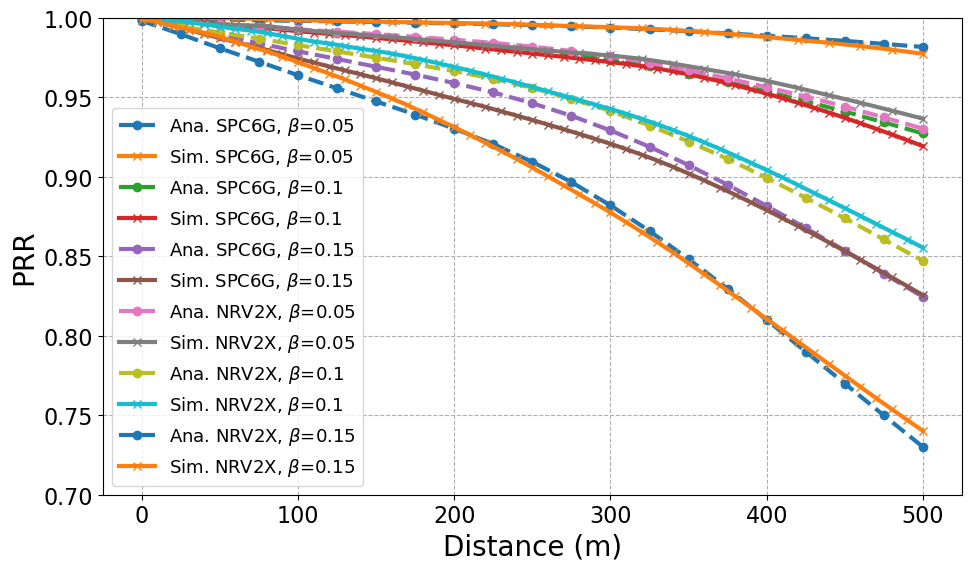

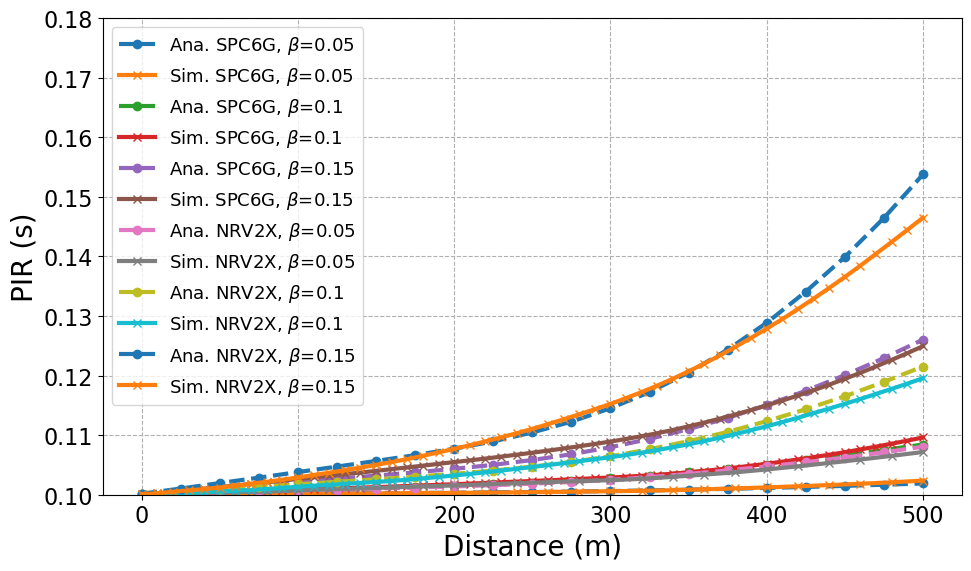

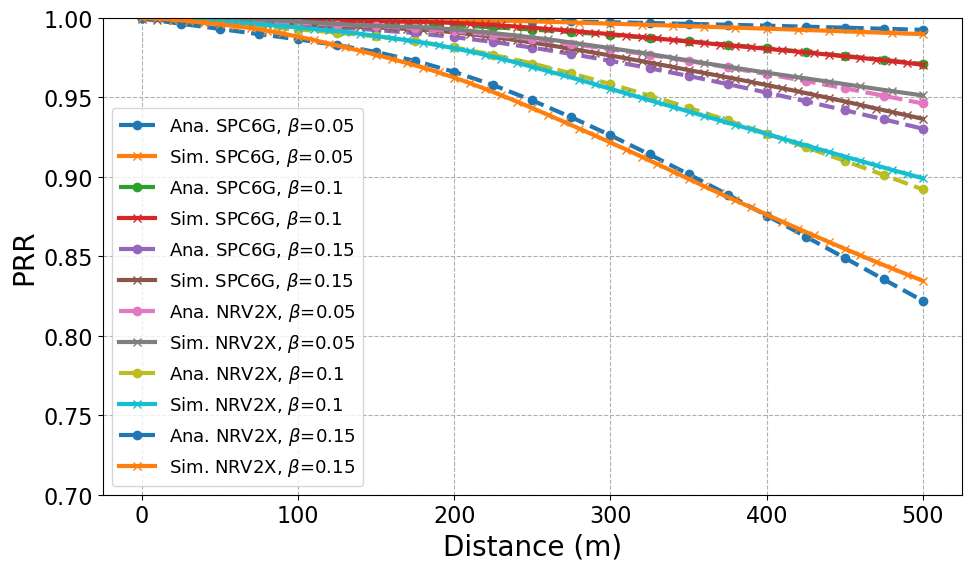

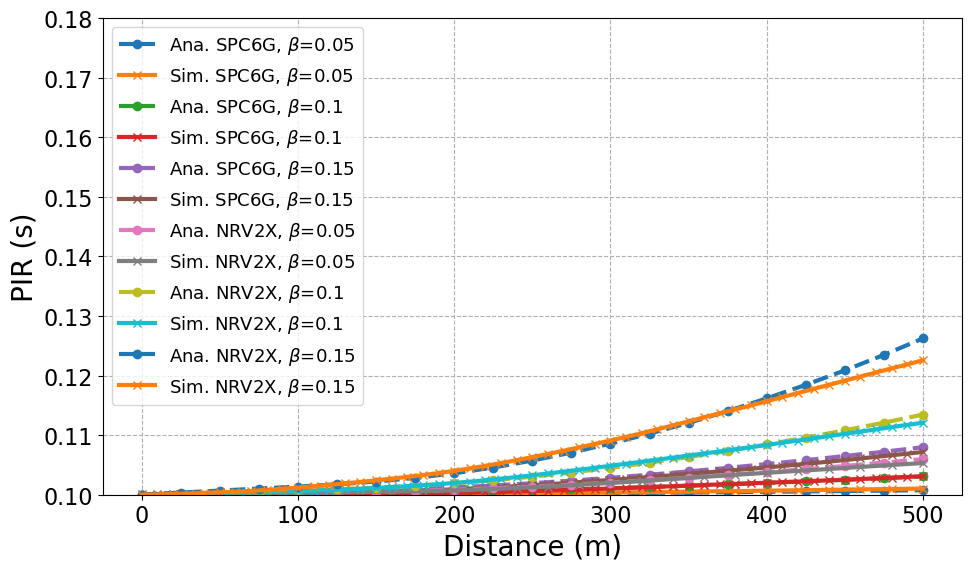

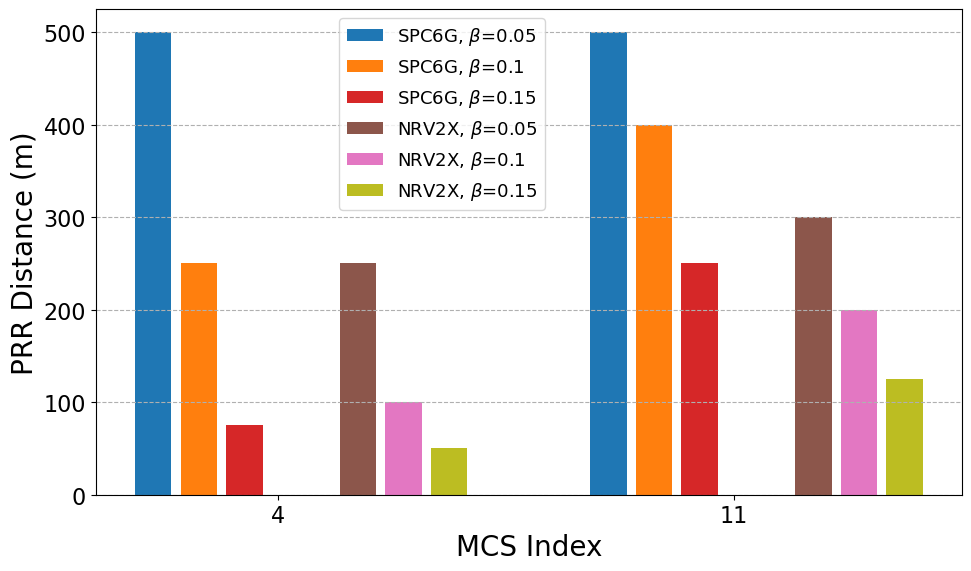

In [6]:
from visualization_analtical_simulations import *

In [7]:
# visualization_simulations_highway

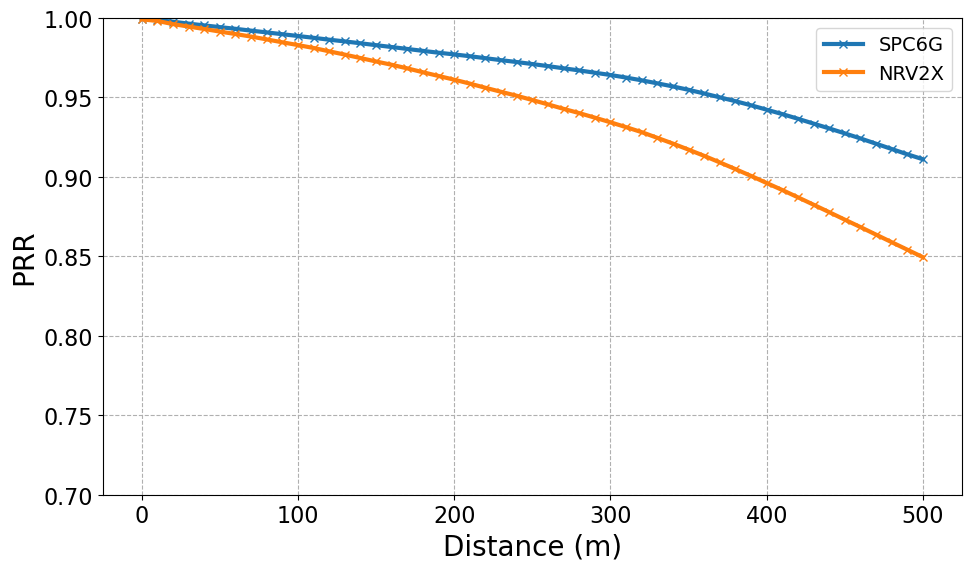

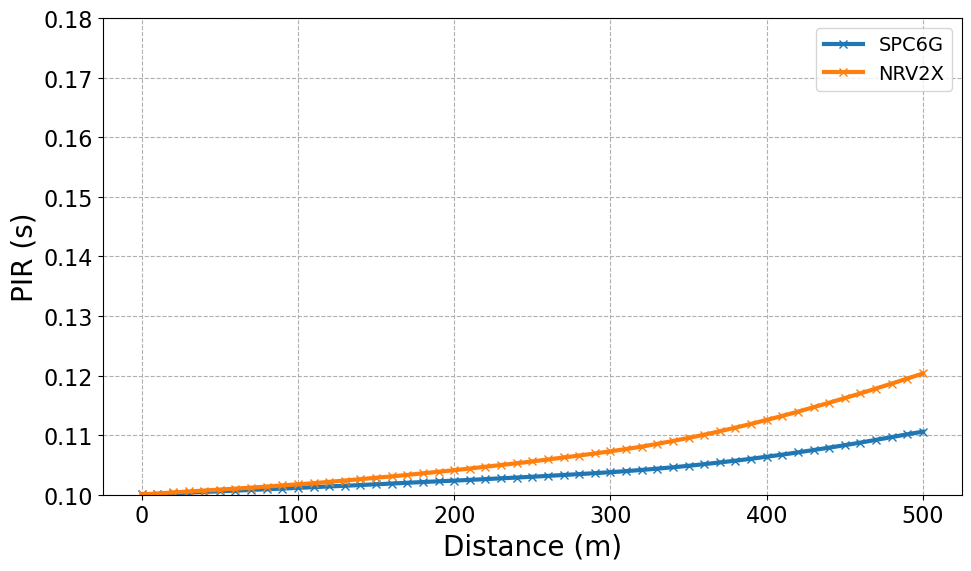

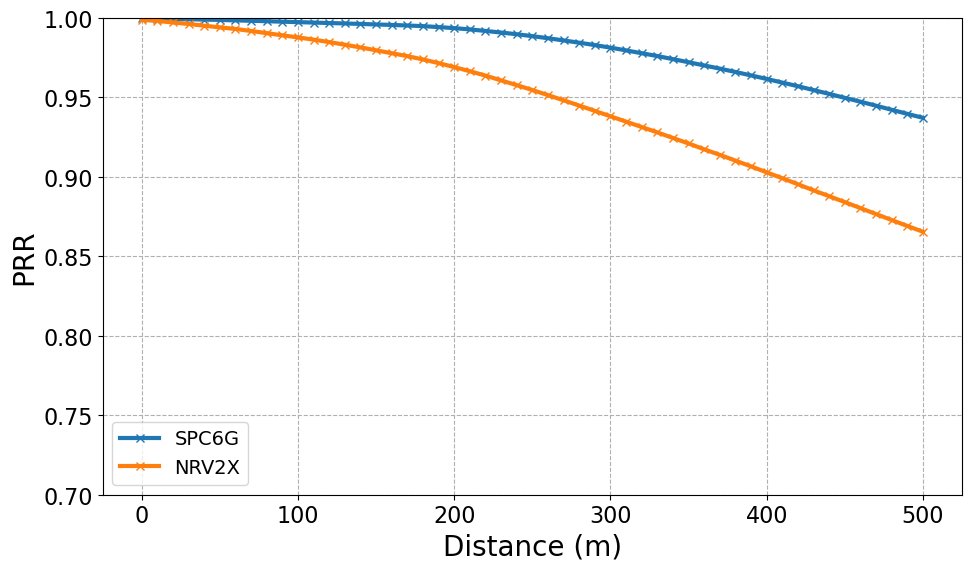

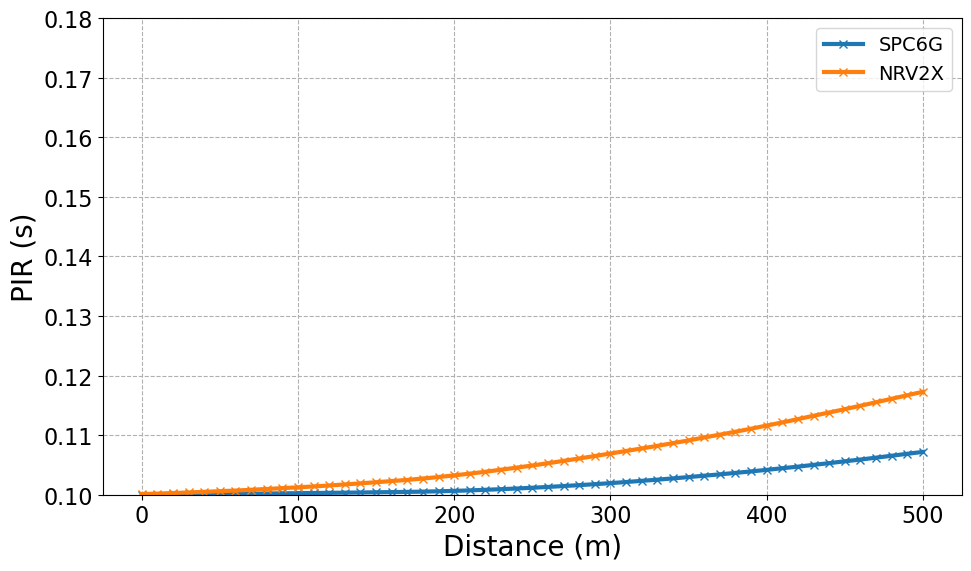

In [8]:

from visualization_simulations_highway import *

In [9]:
#visualization_simulations_urban 

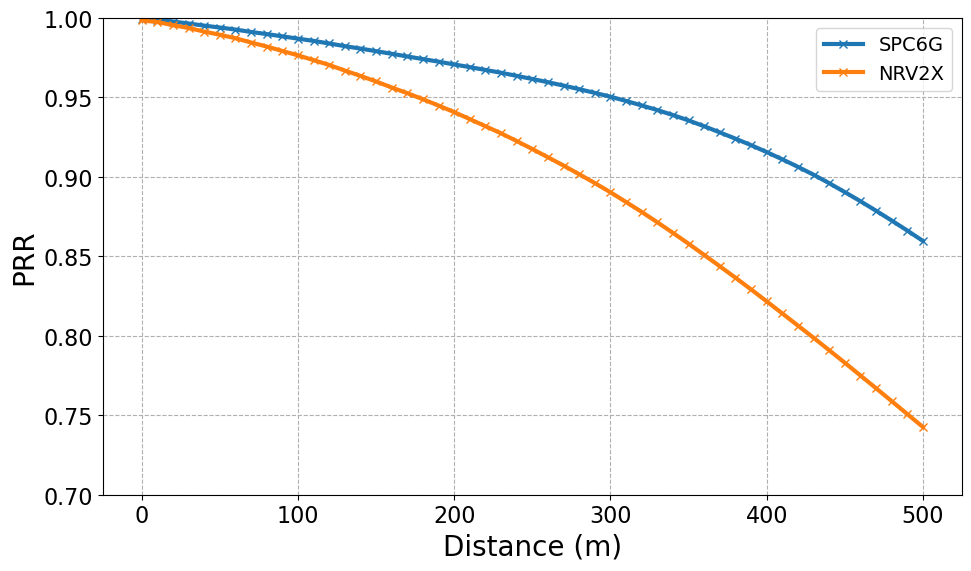

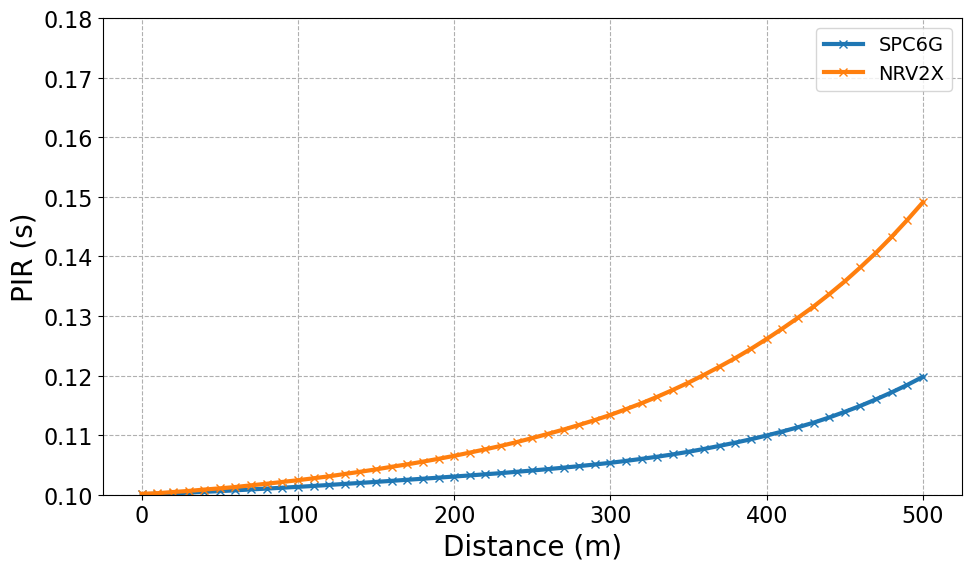

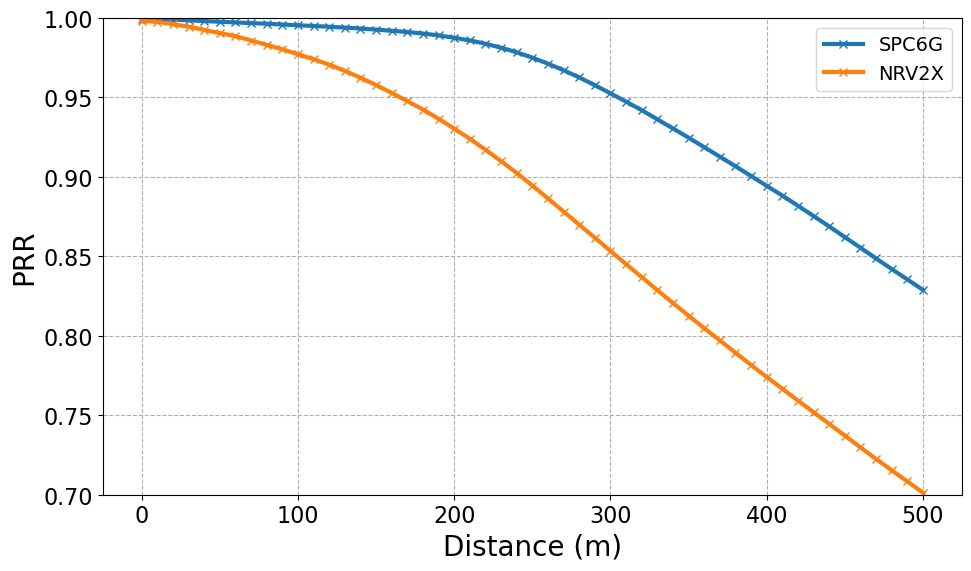

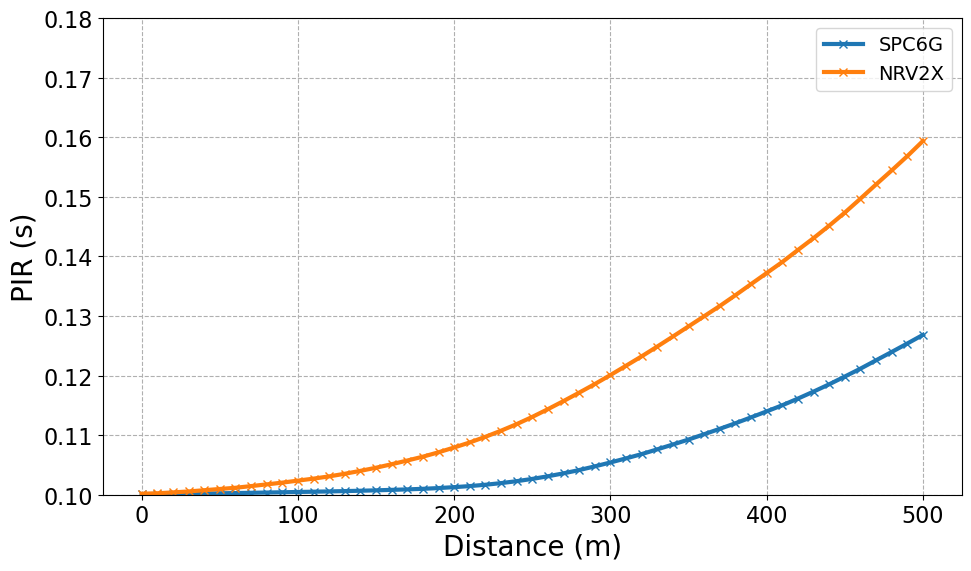

In [12]:
from visualization_simulations_urban import *